#**Random Forest**
---
##Author: Emmanuel Paalam
##V3: MICEV2 processing
##Target variable: F3EVERDO

## Import data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load the transformed data
X_train = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/X_train_MICEimputed.csv')
X_test = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/X_test_MICEimputed.csv')
y_train = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/y_MICEtrain.csv')
y_test = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/y_MICEtest.csv')

print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(10495, 211), (2624, 211), (10495, 1), (2624, 1)


##Model development

###Define parameters, scoring

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [10, 30, 90]
    }

In [ ]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn)

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'specificity': make_scorer(specificity_score),
    'npv': make_scorer(npv_score)
}

###Cross-validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

grid_search = GridSearchCV(RandomForestClassifier(random_state=2030), param_grid=param_grid, scoring=scoring, refit='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

# Access and print the cv_results_
results = grid_search.cv_results_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
# Print the relevant metrics
print("Mean Test Accuracy:", results['mean_test_accuracy'])
print("Mean Test Precision:", results['mean_test_precision'])
print("Mean Test Recall:", results['mean_test_recall'])
print("Mean Test F1:", results['mean_test_f1'])
print("Mean Test Specificity:", results['mean_test_specificity'])
print("Mean Test NPV:", results['mean_test_npv'])

Mean Test Accuracy: [0.94568842 0.94397332 0.94168652 0.94082897 0.94035255 0.93501667
 0.94082897 0.94035255 0.93501667]
Mean Test Precision: [0.93315606 0.93330467 0.94581724 0.93307738 0.93814268 0.94355459
 0.93307738 0.93814268 0.94355459]
Mean Test Recall: [0.75574028 0.74614287 0.7268171  0.72880275 0.72361036 0.69228722
 0.72880275 0.72361036 0.69228722]
Mean Test F1: [0.81586795 0.80746871 0.79236248 0.79195331 0.78788632 0.75730291
 0.79195331 0.78788632 0.75730291]
Mean Test Specificity: [nan nan nan nan nan nan nan nan nan]
Mean Test NPV: [nan nan nan nan nan nan nan nan nan]


In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(best_score))

Best parameters found:  {'criterion': 'gini', 'min_samples_split': 10}
Best cross-validation score: 0.82


### Observe metrics

Accuracy: 0.9439786585365854
Precision: 0.896774193548387
Recall: 0.5148148148148148
F1 Score: 0.6541176470588236
ROC-AUC: 0.9570486799458763
Specificity: 0.9932030586236194
Test Negative Predictive Value (NPV): 0.9469420818144998
Confusion Matrix:
[[2338   16]
 [ 131  139]]


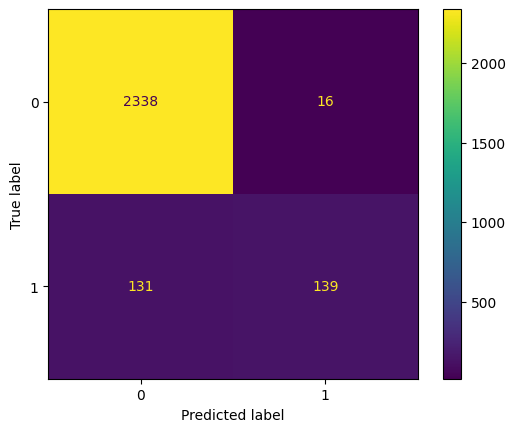

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Retrieve the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Calculate test negative predictive value (NPV)
test_npv = tn / (tn + fn)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"Specificity: {specificity}")
print(f'Test Negative Predictive Value (NPV): {test_npv}')
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot()

##Tree visual

In [ ]:
import numpy as np

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

sorted_importances = importances[indices]
sorted_feature_names = [X_train.columns[i] for i in indices]
sorted_std = std[indices]

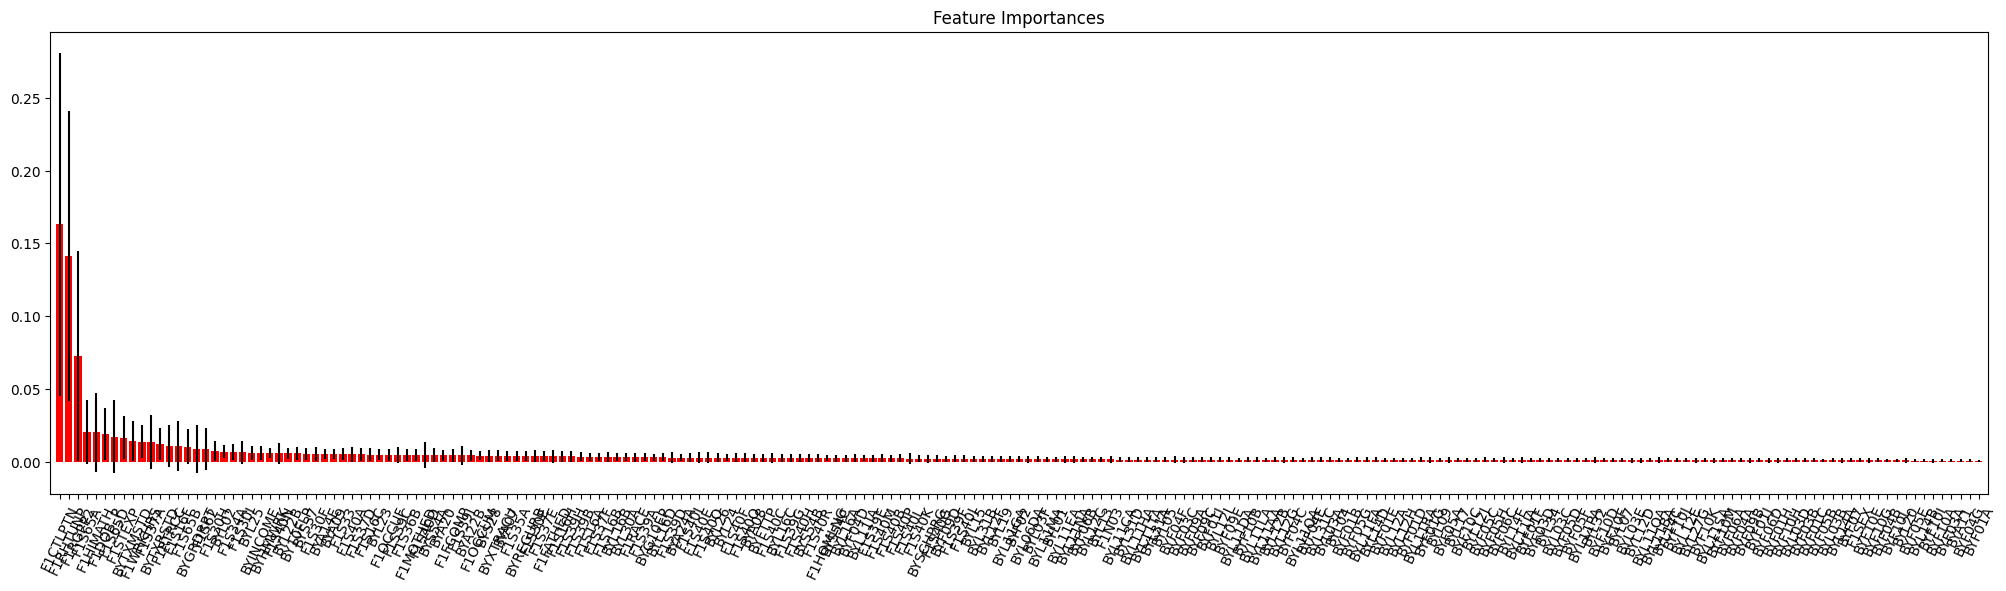

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), sorted_importances, color="r", yerr=sorted_std, align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=65)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
top_features = [X_train.columns[i] for i in indices[:15]]
print(f"15th most important features: {top_features}")

15th most important features: ['F1CTLPTN', 'F1RHTUNP', 'F1RGPP2', 'F1S65A', 'F1HIMATH', 'F1DOB_P', 'F1S65D', 'F1STEXP', 'BYTXMSTD', 'F1WRKHRS', 'F1S37A', 'BYTXRSTD', 'F1RTRCC', 'F1S16F', 'F1S65B']
